<a href="https://colab.research.google.com/github/JoseAaronE/FisicaComputacional/blob/master/Actividad6%5CActividad6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Actividad 6* 

Pronosticos de series de tiempos 

Esquivel Ovilla José Aarón 

In [44]:
#nueva biblioteca a usar 
#import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
#agregamos esta biblioteca que tiene que ver con la prueba de Dickey-Fuller
from statsmodels.tsa.stattools import adfuller
#warning de que las cosas van a cambiar 
import pandas.util.testing as tm
#usaremos esto para el método de ARIMA 
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMAResults
%matplotlib inline

In [45]:
#url del archivo dataframe
url="https://raw.githubusercontent.com/JoseAaronE/FisicaComputacional/master/Actividad1/Estacion3016datos.txt"

columnas=["FECHA", "PRECIP", "EVAP", "TMAX", "TMIN"]
df_dist = pd.read_csv(url, names=columnas, encoding='cp1251', sep='\s+', header=None, skiprows=19, skipfooter=1, engine='python')
#estación 1 "hacemos la copia del trabajo"
df_cop0= df_dist.copy()

#reemplazamos donde dice nulo para que salga en blanco 
str_Nulo= "Nulo"
df_cop1 = df_cop0.replace(to_replace=str_Nulo, value='', regex=True)

#convertimos a numeros flotantes los valores de las variables 
cols_list = ["PRECIP", "EVAP", "TMAX", "TMIN"]
for cols in cols_list:
  df_cop1[cols] = pd.to_numeric(df_cop1[cols], errors='coerce')

#hacemos otra copia del archivo
df_cop2 = df_cop1.copy()

df_cop2["FECHA"]=pd.to_datetime(df_cop2["FECHA"], dayfirst=True).copy()

df_cop2['Año'] = df_cop2['FECHA'].dt.year
df_cop2['Mes'] = df_cop2['FECHA'].dt.month

df_meteo = df_cop2.copy()
#eliminamos las columnas de mes que es están como numeros y las cambiaremos por caracteres
df_meteo.drop("Mes", axis=1, inplace=True)
df_meteo["Mes"] = df_meteo["FECHA"].dt.strftime("%b")

df_meteo_ts=df_meteo.copy()
df_meteo_ts=df_meteo_ts.set_index('FECHA')

#creamos las colecciones de datos 
df_30 = df_meteo_ts[(df_meteo_ts['Año'] >= 1941) & (df_meteo_ts['Año'] < 1971)]
df_60 = df_meteo_ts[(df_meteo_ts['Año'] >= 1971) & (df_meteo_ts['Año'] < 2001)]
df_90 = df_meteo_ts[(df_meteo_ts['Año'] >= 2001) & (df_meteo_ts['Año'] < 2017)]


In [46]:
#con esto probamos la estacionaridad 
def test_stationarity(df_ts):
    
    #Determinar la Estadística de promedios móviles
    rolmean = df_ts.rolling(window=365, center=True).mean()
    rolstd = df_ts.rolling(window=365, center=True).std() 
    
    # tamaño de la gráfica 
    plt.rcParams["figure.figsize"] = (12,6)

    #Graficar la Estadística de promedios móviles 
    #graficamos la serie 
    plt.plot(df_ts, color='blue',label='Original')
    #graficamos el promedio movil 
    plt.plot(rolmean, color='red', label='Rolling Mean')
    #graficamos la desviación estandar 
    plt.plot(rolstd, color='black', label = 'Rolling Std Deviation')
 
    plt.legend(loc='best')
    plt.title('Promedio Móvil y Desviación Estándar')
    #agragamos una malla
    plt.grid()
    plt.show()
 
    #Realizamos la Prueba Aumentada de Dickey-Fuller a nuestra serie de tiempo 
    print('Resultados de la Prueba de Dickey-Fuller:')
    dftest = adfuller(df_ts, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], 
                         index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

#hipotesis nula: la serie no es estacionaria y si su valor "p" es menor que el 5% rachazamos la hipotesis 

In [47]:
#checamos nuestra primera serie de tiempo 
#hacemos una copia de nuestro rango de años seleccionado 
#filtramos nuestra información 
start, end = '2010-01', '2015-12'
ts_90 = df_90.loc[start:end].copy()
ts_90.head()


,PRECIP,EVAP,TMAX,TMIN,Año,Mes
FECHA,,,,,,
2010-01-01,0.0,NaN,24.0,8.0,2010,Jan
2010-01-02,0.0,NaN,23.0,10.0,2010,Jan
2010-01-03,0.0,NaN,24.0,8.0,2010,Jan
2010-01-04,0.0,NaN,25.0,11.0,2010,Jan
2010-01-05,0.0,NaN,25.0,14.0,2010,Jan


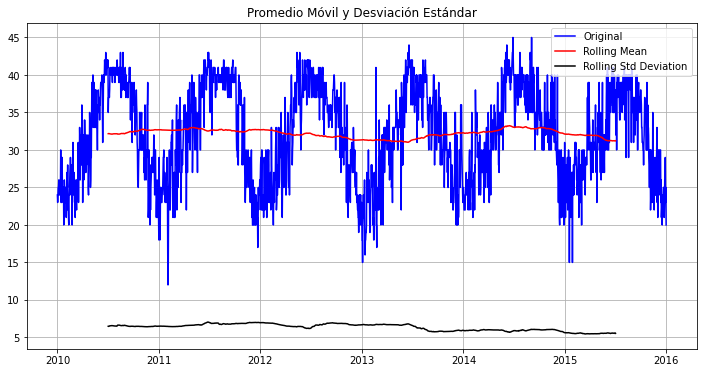

Resultados de la Prueba de Dickey-Fuller:
Test Statistic                   -3.031671
p-value                           0.032041
#Lags Used                       15.000000
Number of Observations Used    2174.000000
Critical Value (1%)              -3.433362
Critical Value (5%)              -2.862870
Critical Value (10%)             -2.567478
dtype: float64


In [48]:
#primero estudiaremos a Tmax
ts_test_tmax = ts_90['TMAX'].copy()
#se la damos como argumento a la prueba 
test_stationarity(ts_test_tmax)

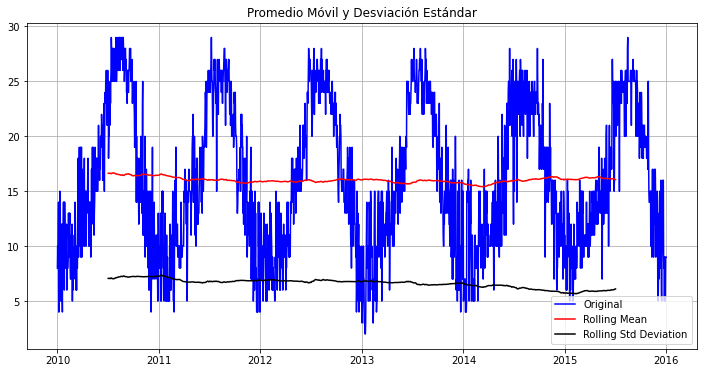

Resultados de la Prueba de Dickey-Fuller:
Test Statistic                   -2.662190
p-value                           0.080813
#Lags Used                       11.000000
Number of Observations Used    2178.000000
Critical Value (1%)              -3.433356
Critical Value (5%)              -2.862868
Critical Value (10%)             -2.567477
dtype: float64


In [49]:
#hacemos la prueba con Tmin
ts_test_tmin = ts_90['TMIN'].copy()
#se la damos como argumento a la prueba 
test_stationarity(ts_test_tmin)

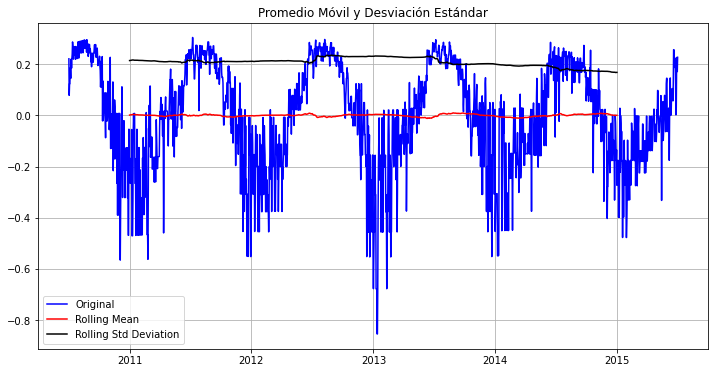

Resultados de la Prueba de Dickey-Fuller:
Test Statistic                   -2.673206
p-value                           0.078791
#Lags Used                       20.000000
Number of Observations Used    1805.000000
Critical Value (1%)              -3.433978
Critical Value (5%)              -2.863143
Critical Value (10%)             -2.567623
dtype: float64


In [50]:
#como la temperatura mínima nos dio P menor a 0.05, cambiamos la escala 
#seleccionamos la función de logaritmo 
ts_test_log = np.log10(ts_test_tmin)

#calculamos el promedio móvil con con ventana de 365 días 
moving_avg = ts_test_log.rolling(365, center=True).mean()

ts_test_log_moving_ave_diff = ts_test_log - moving_avg 
ts_test_log_moving_ave_diff.head()

ts_test_log_moving_ave_diff.dropna(inplace=True)
ts_test_log_moving_ave_diff.head()
#probamos la estacionaridad 
test_stationarity(ts_test_log_moving_ave_diff)


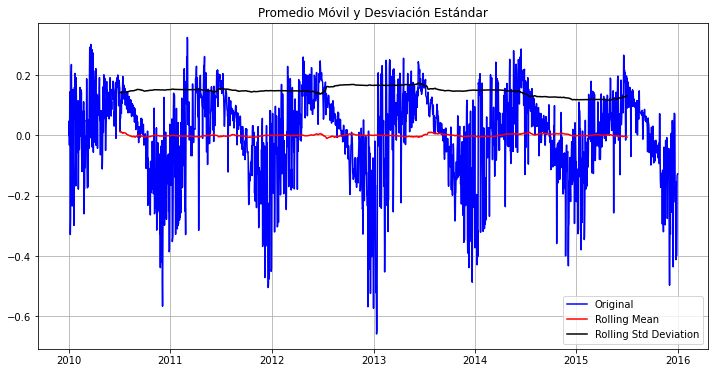

Resultados de la Prueba de Dickey-Fuller:
Test Statistic                   -3.512705
p-value                           0.007667
#Lags Used                       18.000000
Number of Observations Used    2171.000000
Critical Value (1%)              -3.433366
Critical Value (5%)              -2.862872
Critical Value (10%)             -2.567479
dtype: float64


In [51]:
#podemos notar que el valor P sigue siendo mayor a 5% 
#cambiamos el tipo de promedio móvil a exponencial 
EWM_avg = ts_test_log.ewm(halflife=30).mean()

#estacionaridad de la diferencia 
ts_test_log_EWM_avg_diff = ts_test_log - EWM_avg

#estacionaridad usando log y EWM
test_stationarity(ts_test_log_EWM_avg_diff)

Pronóstico de serie de tiempo 

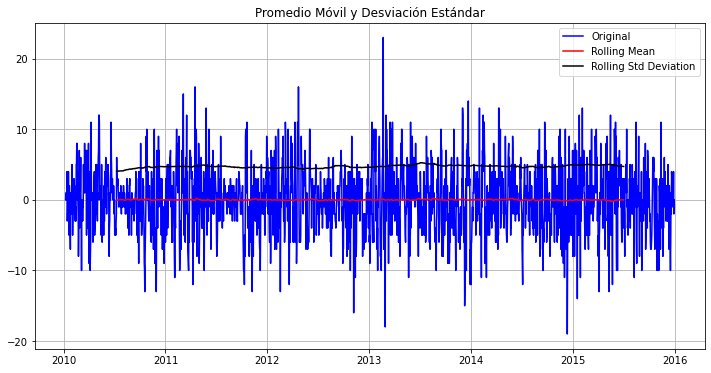

Resultados de la Prueba de Dickey-Fuller:
Test Statistic                -9.565397e+00
p-value                        2.364611e-16
#Lags Used                     2.300000e+01
Number of Observations Used    2.159000e+03
Critical Value (1%)           -3.433382e+00
Critical Value (5%)           -2.862880e+00
Critical Value (10%)          -2.567483e+00
dtype: float64


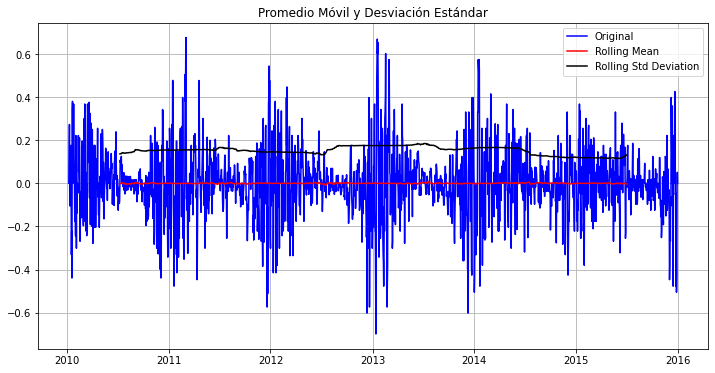

Resultados de la Prueba de Dickey-Fuller:
Test Statistic                -1.053340e+01
p-value                        9.029248e-19
#Lags Used                     2.200000e+01
Number of Observations Used    2.160000e+03
Critical Value (1%)           -3.433381e+00
Critical Value (5%)           -2.862879e+00
Critical Value (10%)          -2.567483e+00
dtype: float64


2183

In [52]:

#eliminamos la estacionalidad en los datos de la temperatura máxima 

ts_test_tmax_diff = ts_test_tmax - ts_test_tmax.shift(periods=7)

ts_test_tmax_diff.dropna(inplace=True)
test_stationarity(ts_test_tmax_diff)

len(ts_test_tmax)

#eliminamos la estacionalidad en los datos de la temperatura mínima 
ts_test_log_diff = ts_test_log - ts_test_log.shift(periods=7)

ts_test_log_diff.dropna(inplace=True)
test_stationarity(ts_test_log_diff)

len(ts_test_log_diff)


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


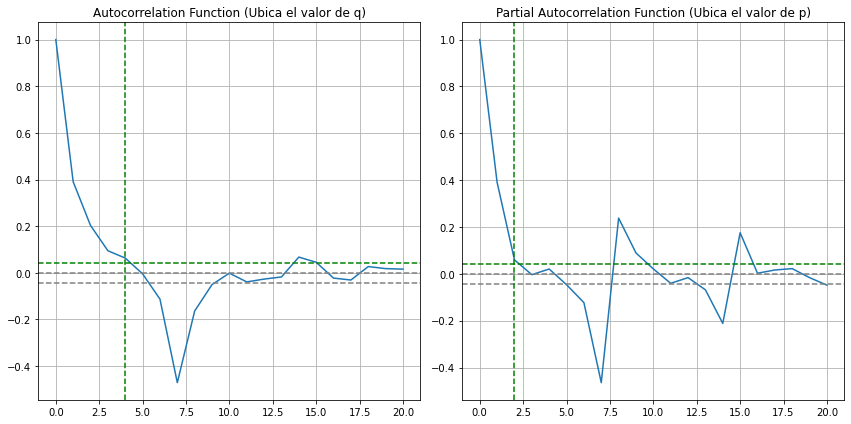

In [53]:
#usamos el método ARIMA para Tmax 
lag_acf = acf(ts_test_tmax_diff, nlags=20)
lag_pacf = pacf(ts_test_tmax_diff, nlags=20, method = 'ols')

#graficamos
# Tamaño de las gráficas
plt.rcParams["figure.figsize"] = (12,6)

# Gráfica de ACF (Autocorrelation Function)
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_test_tmax_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_test_tmax_diff)), linestyle='--', color='green')
# Graficamos unas líneas verticales como referencias
#plt.axvline(x=3, linestyle='--', color='green')
plt.axvline(x=4, linestyle='--', color='green')
plt.grid()
plt.title('Autocorrelation Function (Ubica el valor de q)')

# Gráfica de PACF (Partial Autocorrelation Function)
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_test_tmax_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_test_tmax_diff)), linestyle='--', color='green')
# Graficamos unas líneas verticales como referencias 
plt.axvline(x=2, linestyle='--', color='green')
plt.grid()
plt.title('Partial Autocorrelation Function (Ubica el valor de p)')

plt.tight_layout()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


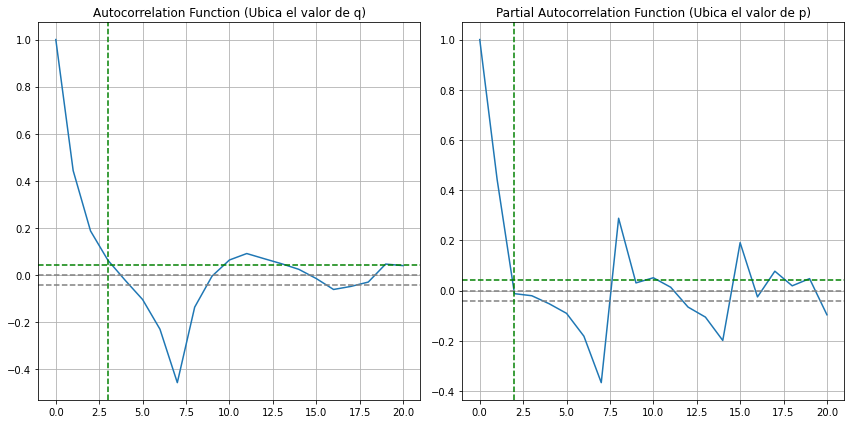

In [63]:
#usamos el método ARIMA para Tmin
lag_acf = acf(ts_test_log_diff, nlags=20)
lag_pacf = pacf(ts_test_log_diff, nlags=20, method = 'ols')

#graficamos
# Tamaño de las gráficas
plt.rcParams["figure.figsize"] = (12,6)

# Gráfica de ACF (Autocorrelation Function)
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_test_log_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_test_log_diff)), linestyle='--', color='green')
# Graficamos unas líneas verticales como referencias
#plt.axvline(x=3, linestyle='--', color='green')
plt.axvline(x=3, linestyle='--', color='green')
plt.grid()
plt.title('Autocorrelation Function (Ubica el valor de q)')

# Gráfica de PACF (Partial Autocorrelation Function)
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_test_log_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_test_log_diff)), linestyle='--', color='green')
# Graficamos unas líneas verticales como referencias 
plt.axvline(x=2, linestyle='--', color='green')
plt.grid()
plt.title('Partial Autocorrelation Function (Ubica el valor de p)')

plt.tight_layout()

Modelo AR (Auto-Regresión)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.TMAX   No. Observations:                 2189
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -5682.448
Method:                       css-mle   S.D. of innovations              3.244
Date:                Sat, 20 Feb 2021   AIC                          11372.896
Time:                        01:56:44   BIC                          11395.661
Sample:                             1   HQIC                         11381.217
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0010      0.043     -0.022      0.982      -0.085       0.083
ar.L1.D.TMAX    -0.4150      0.021    -19.836      0.000      -0.456      -0.374
ar.L2.D.TMAX    -0.2058      0.021     -9.83

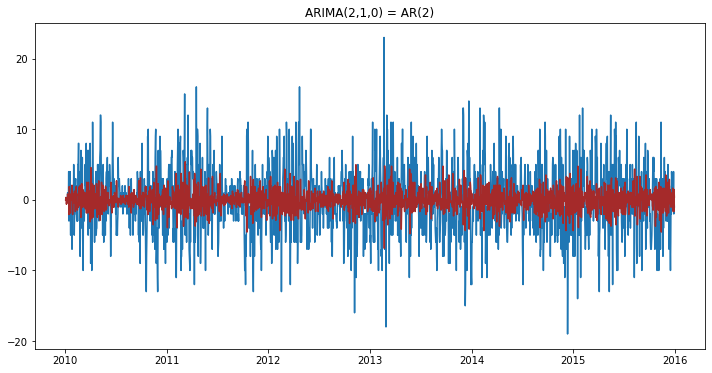

In [55]:
#Modelo AR para la temperatura máxima 
model = ARIMA(ts_test_tmax, order=(2,1,0), missing='drop')
results_AR = model.fit(displ=-1)
plt.plot(ts_test_tmax_diff)
plt.plot(results_AR.fittedvalues, color='brown')
plt.title('ARIMA(2,1,0) = AR(2)')
print(results_AR.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.TMIN   No. Observations:                 2189
Model:                 ARIMA(2, 1, 0)   Log Likelihood                1813.819
Method:                       css-mle   S.D. of innovations              0.106
Date:                Sat, 20 Feb 2021   AIC                          -3619.639
Time:                        01:56:45   BIC                          -3596.874
Sample:                             1   HQIC                         -3611.318
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.388e-05      0.001      0.010      0.992      -0.003       0.003
ar.L1.D.TMIN    -0.3392      0.021    -16.364      0.000      -0.380      -0.299
ar.L2.D.TMIN    -0.2427      0.021    -11.71

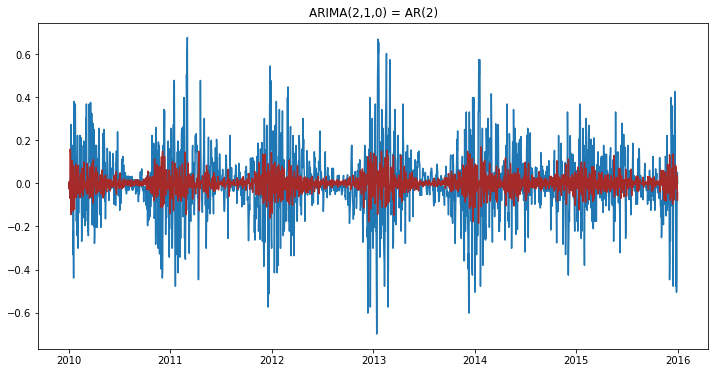

In [56]:
#Modelo AR para la temperatura mínima 
model = ARIMA(ts_test_log, order=(2,1,0), missing='drop')
results_AR = model.fit(displ=-1)
plt.plot(ts_test_log_diff)
plt.plot(results_AR.fittedvalues, color='brown')
plt.title('ARIMA(2,1,0) = AR(2)')
print(results_AR.summary())

Modelo MA (Promedio Móvil)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.TMAX   No. Observations:                 2189
Model:                 ARIMA(1, 1, 3)   Log Likelihood               -5564.524
Method:                       css-mle   S.D. of innovations              3.074
Date:                Sat, 20 Feb 2021   AIC                          11141.048
Time:                        02:00:03   BIC                          11175.195
Sample:                             1   HQIC                         11153.529
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0004      0.014     -0.028      0.978      -0.028       0.027
ar.L1.D.TMAX     0.2017      0.181      1.112      0.266      -0.154       0.557
ma.L1.D.TMAX    -0.7431      0.181     -4.10

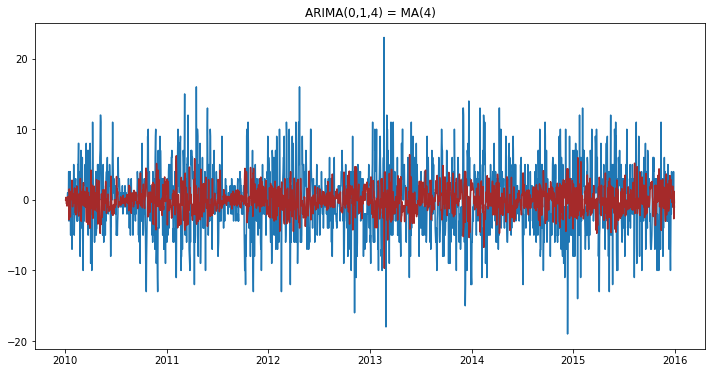

In [64]:
#Modelo MA para temperatura máxima 

model = ARIMA(ts_test_tmax, order=(1,1,3), missing='drop')
results_MA = model.fit(displ=-1)
plt.plot(ts_test_tmax_diff)
plt.plot(results_MA.fittedvalues, color='brown')
plt.title('ARIMA(0,1,4) = MA(4)')
print(results_MA.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.TMIN   No. Observations:                 2189
Model:                 ARIMA(1, 1, 3)   Log Likelihood                1943.401
Method:                       css-mle   S.D. of innovations              0.100
Date:                Sat, 20 Feb 2021   AIC                          -3874.801
Time:                        02:00:13   BIC                          -3840.654
Sample:                             1   HQIC                         -3862.320
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.533e-06      0.000      0.004      0.997      -0.001       0.001
ar.L1.D.TMIN     0.2794      0.176      1.589      0.112      -0.065       0.624
ma.L1.D.TMIN    -0.7624      0.176     -4.32

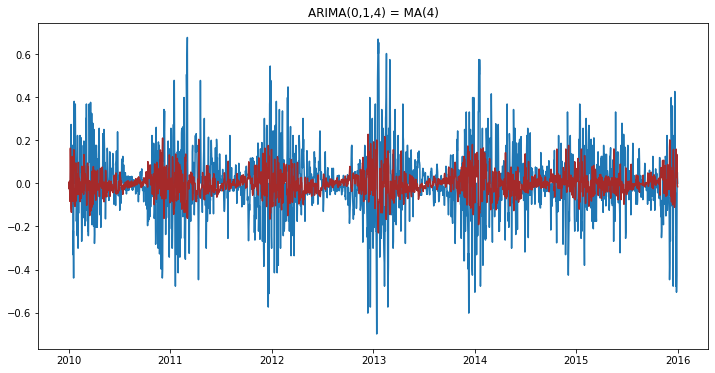

In [65]:
#Modelo MA para temperatura mínima 
model = ARIMA(ts_test_log, order=(1,1,3), missing='drop')
results_MA = model.fit(displ=-1)
plt.plot(ts_test_log_diff)
plt.plot(results_MA.fittedvalues, color='brown')
plt.title('ARIMA(0,1,4) = MA(4)')
print(results_MA.summary())

Modelo ARIMA (Auto-Regresión + Promedio Móvil)



/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.TMAX   No. Observations:                 2189
Model:                 ARIMA(2, 1, 3)   Log Likelihood               -5564.502
Method:                       css-mle   S.D. of innovations              3.074
Date:                Sat, 20 Feb 2021   AIC                          11143.005
Time:                        02:00:33   BIC                          11182.843
Sample:                             1   HQIC                         11157.566
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0004      0.014     -0.028      0.978      -0.028       0.027
ar.L1.D.TMAX     0.2927      0.467      0.627      0.531      -0.622       1.207
ar.L2.D.TMAX    -0.0470      0.213     -0.22

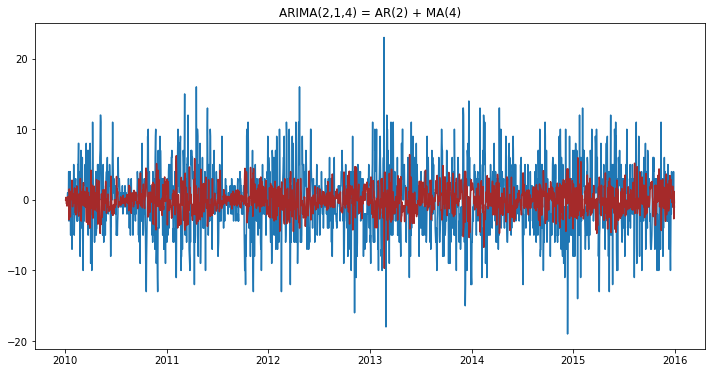

In [66]:
#modelo ARIMA para temperatura máxima 
model = ARIMA(ts_test_tmax, order=(2,1,3), missing='drop')
results_ARIMA = model.fit(displ=-1)
plt.plot(ts_test_tmax_diff)
plt.plot(results_ARIMA.fittedvalues, color='brown')
plt.title('ARIMA(2,1,4) = AR(2) + MA(4)')
print(results_ARIMA.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.TMIN   No. Observations:                 2189
Model:                 ARIMA(2, 1, 3)   Log Likelihood                1943.417
Method:                       css-mle   S.D. of innovations              0.100
Date:                Sat, 20 Feb 2021   AIC                          -3872.835
Time:                        02:00:54   BIC                          -3832.996
Sample:                             1   HQIC                         -3858.274
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.605e-06      0.000      0.004      0.997      -0.001       0.001
ar.L1.D.TMIN    -0.1555      1.575     -0.099      0.921      -3.243       2.932
ar.L2.D.TMIN     0.1300      0.434      0.30

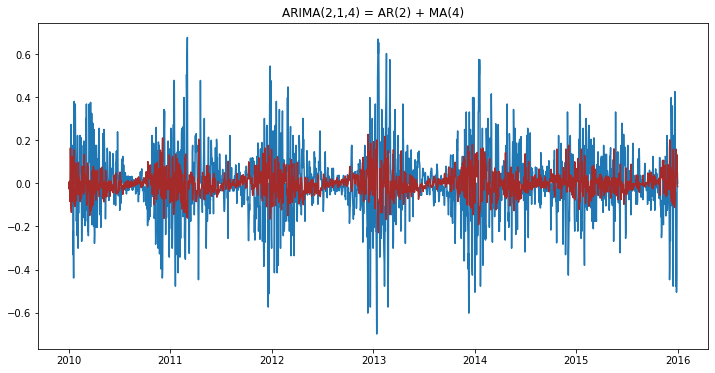

In [67]:
#metodo ARIMA para temperatura mínima 
model = ARIMA(ts_test_log, order=(2,1,3), missing='drop')
results_ARIMA = model.fit(displ=-1)
plt.plot(ts_test_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='brown')
plt.title('ARIMA(2,1,4) = AR(2) + MA(4)')
print(results_ARIMA.summary())

Hacemos las predicciones 

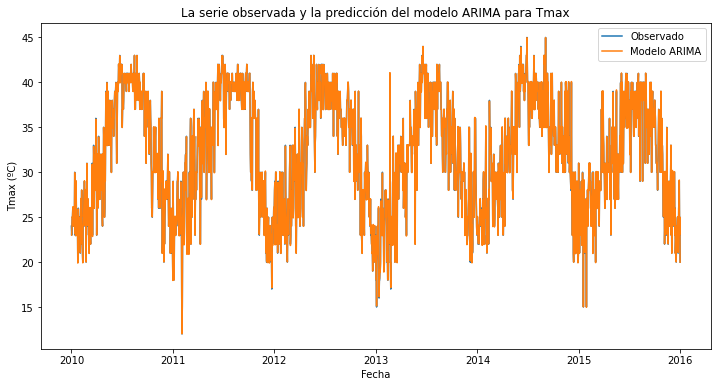

In [74]:
#AIC de la temperatura máxima 
#AR: 11372.896
#MA:  11141.048
#ARIMA: 11143.005
#Podemos notar que el método MA fue el que más funcionó 
#definiremos series de tiempo para hacer las predicciones con el método de ARIMA
predictions_ARIMA_diff = pd.Series(results_MA.fittedvalues, copy=True)
#Sumamos las predicciones de ARIMA a la serie observada 
predictions_ARIMA = pd.Series(ts_test_tmax , index = ts_test_tmax .index)
predictions_ARIMA = predictions_ARIMA.add(predictions_ARIMA_diff)

# Graficamos la serie original y las predicciones con ARIMA

# Tamaño de las gráficas
plt.rcParams["figure.figsize"] = (12,6)

plt.plot(ts_test_tmax, label='Observado');
plt.plot(predictions_ARIMA, label='Modelo ARIMA');
plt.xlabel('Fecha')
plt.ylabel('Tmax (ºC)')
plt.title('La serie observada y la predicción del modelo ARIMA para Tmax')
plt.legend(loc='best');

In [73]:
#calculamos el RMSE para la temperatura máxima
RMSE = np.sqrt(np.mean((predictions_ARIMA- ts_test_tmax)**2))
print('RMSE:', RMSE)

RMSE: 16.739911049209134


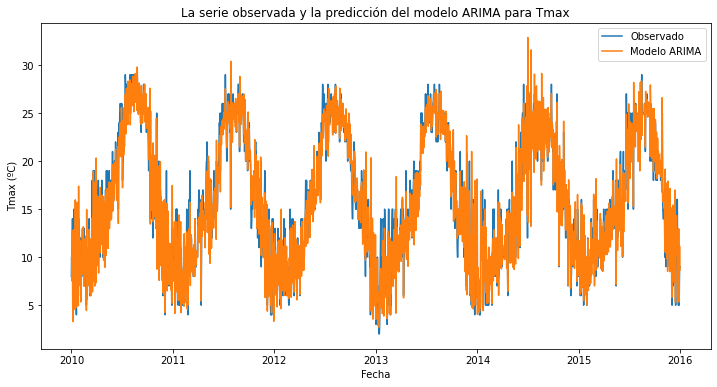

In [69]:
#temperatura mínima 
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)

predictions_ARIMA_log = pd.Series(ts_test_log, index = ts_test_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff)

# Regresamos a la escala de Temperatura original 
predictions_ARIMA = 10**(predictions_ARIMA_log)
# Graficamos la serie original y las predicciones con ARIMA

# Tamaño de las gráficas
plt.rcParams["figure.figsize"] = (12,6)

plt.plot(ts_test_tmin, label='Observado');
plt.plot(predictions_ARIMA, label='Modelo ARIMA');
plt.xlabel('Fecha')
plt.ylabel('Tmax (ºC)')
plt.title('La serie observada y la predicción del modelo ARIMA para Tmax')
plt.legend(loc='best');


In [71]:
#vamos a calcular el RMSE de temperatura mínima 
RMSE = np.sqrt(np.mean((predictions_ARIMA - ts_test_tmin)**2))
print('RMSE:', RMSE)


RMSE: 1.5422482694537367
